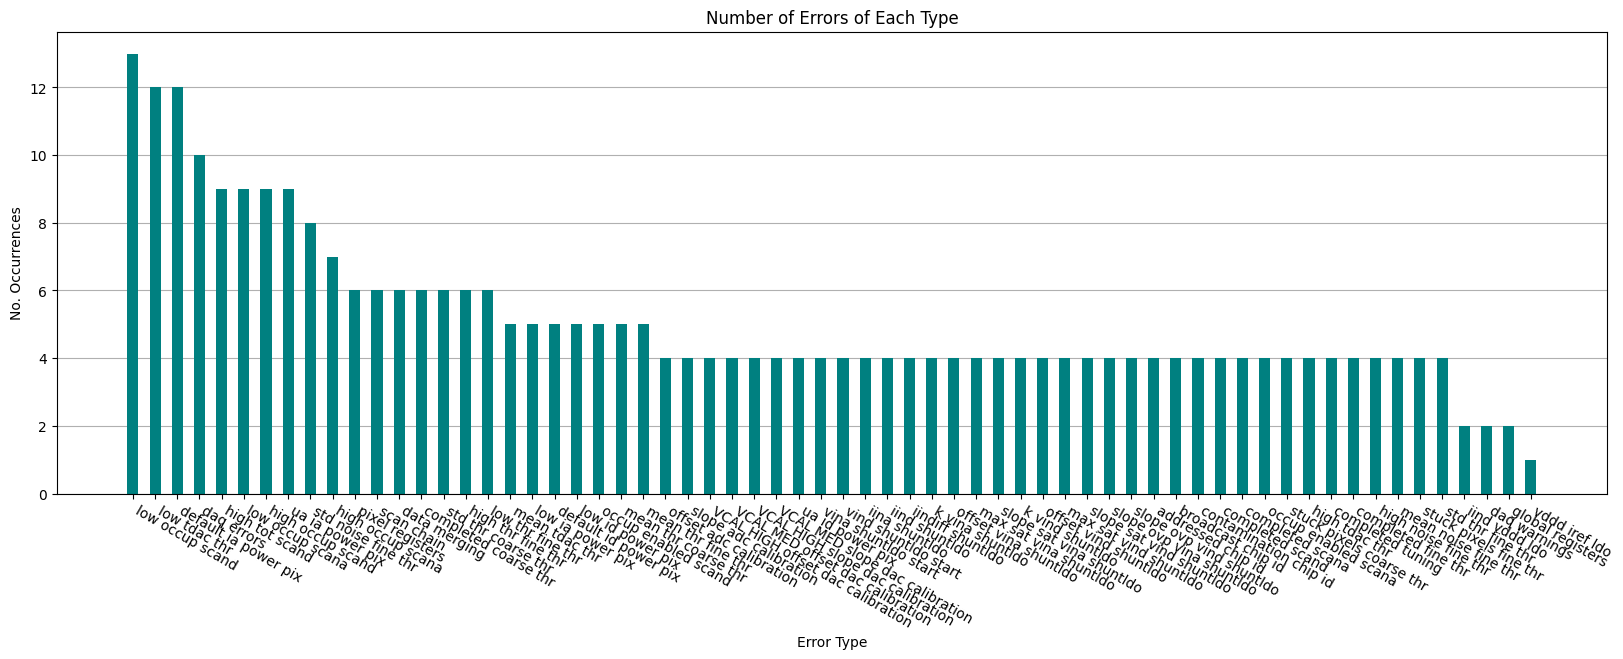

In [39]:
#gets counts of each failed test
#uses chip_statuses file
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/_chip_statuses_NC0W14-05A4_20240607_150356.json'), 'r') as file:
    data = json.load(file)

errors = []
for colors,chips in data.items():
    for chip,error in chips.items():
        errors.extend(error)
        
fail = 0
for colors,chips in data.items():
    for chip,error in chips.items():
        fail += 1
#print(fail)   
        
counted_errors = Counter(errors)
    
# Plot
alph_data = dict(counted_errors.most_common())
labels = [s.replace("_"," ") for s in list(alph_data.keys())]
values = list(alph_data.values())

fig = plt.figure(figsize = (20, 6))

# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()   

# Print the counts
#for error, count in alph_data.items():
    #print(f"{error}: {count}")

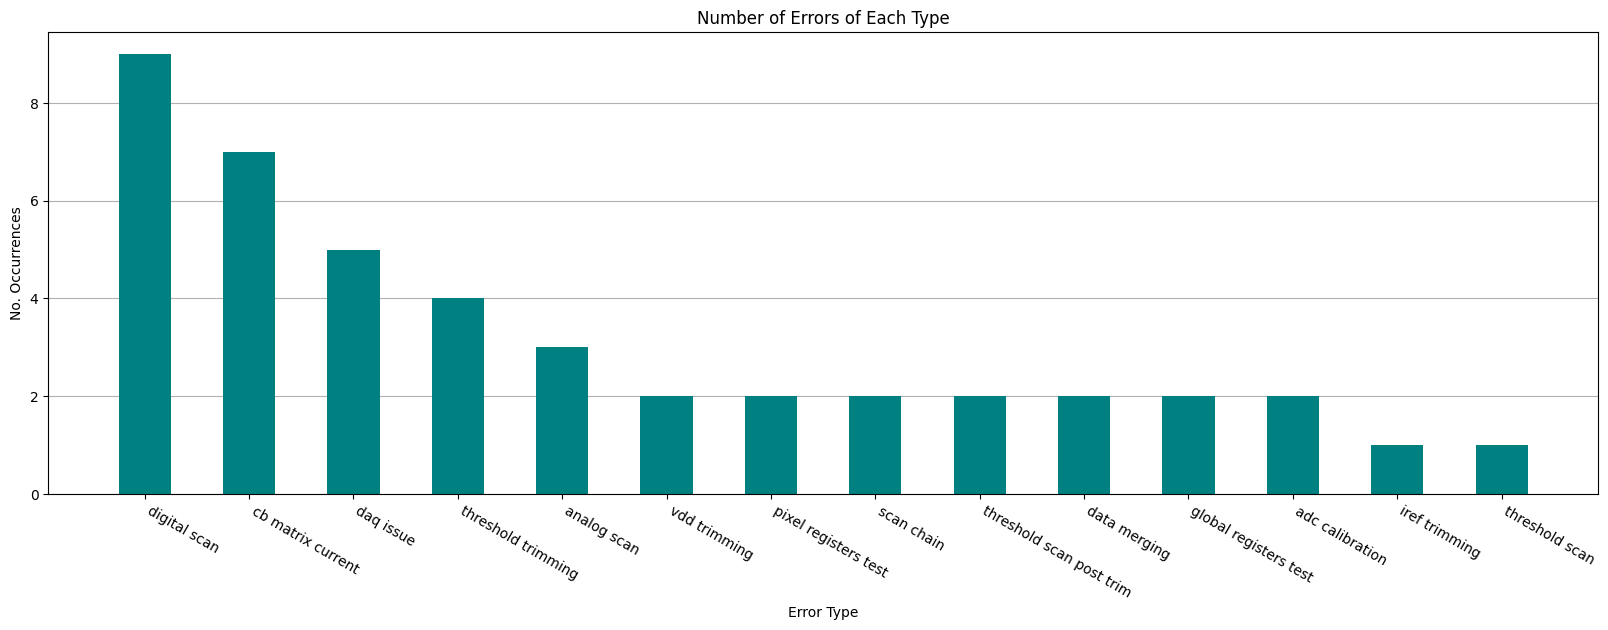

In [36]:
#gets all failure reasons
#using indiv. chip json files (db folder)
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
folder = '~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/db/'
pattern = r'chip_(.*).json'
errors = []
for i in os.listdir(os.path.expanduser(folder)):
    match = re.search(pattern, i)
    if match:
        filepath = str(folder + i)
        with open(os.path.expanduser(filepath), 'r') as file:
            data = json.load(file)
        for k,v in data.items():
                if k == "FAILURE_REASON" and v != None:
                    errors.append(v)

#count number of each error
counted_errors = Counter(errors)
    
# Plot
alph_data = dict(counted_errors.most_common())
labels = [s.replace("_"," ") for s in list(alph_data.keys())]
values = list(alph_data.values())
fig = plt.figure(figsize = (20, 6))

# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()   

# Print the counts
#for error, count in alph_data.items():
    #print(f"{error}: {count}")

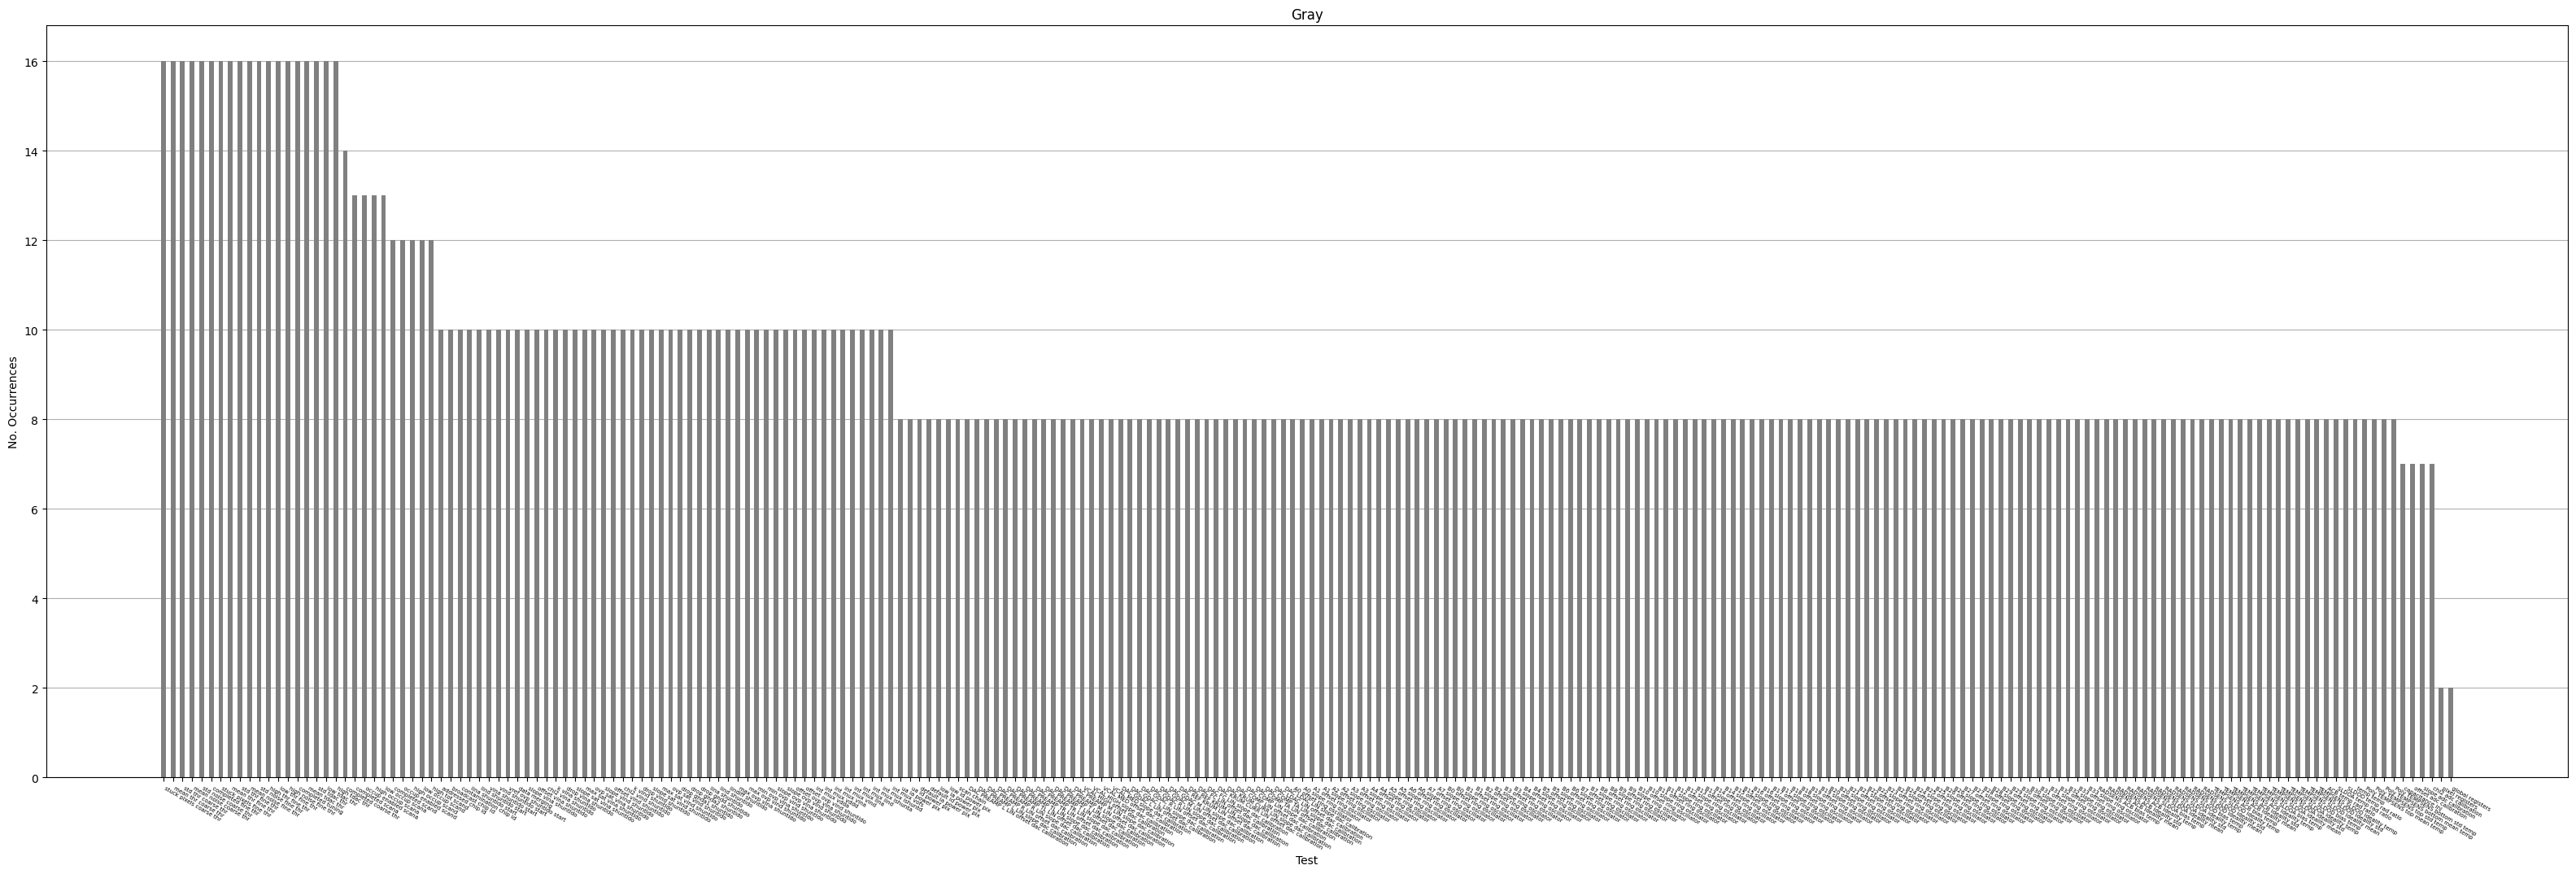

stuck pixels coarse thr: 16
mean thr coarse thr: 16
std thr coarse thr: 16
mean noise coarse thr: 16
std noise coarse thr: 16
completed fine thr: 16
stuck pixels fine thr: 16
mean thr fine thr: 16
std thr fine thr: 16
mean noise fine thr: 16
std noise fine thr: 16
high thr fine thr: 16
low thr fine thr: 16
high noise fine thr: 16
completed tuning: 16
mean tdac thr: 16
std tdac thr: 16
low tdac thr: 16
high tdac thr: 16
completed coarse thr: 14
completed scana: 13
occup enabled scana: 13
high occup scana: 13
low occup scana: 13
completed scand: 12
occup enabled scand: 12
high occup scand: 12
low occup scand: 12
high tot scand: 12
addressed chip id: 10
broadcast chip id: 10
contamination chip id: 10
iina shuntldo start: 10
iind shuntldo start: 10
vina shuntldo start: 10
vind shuntldo start: 10
vref ovp shuntldo start: 10
data merging: 10
slope vina shuntldo: 10
offset vina shuntldo: 10
chi2 vina shuntldo: 10
k vina shuntldo: 10
drop vina shuntldo: 10
slope sat vina shuntldo: 10
max sat v

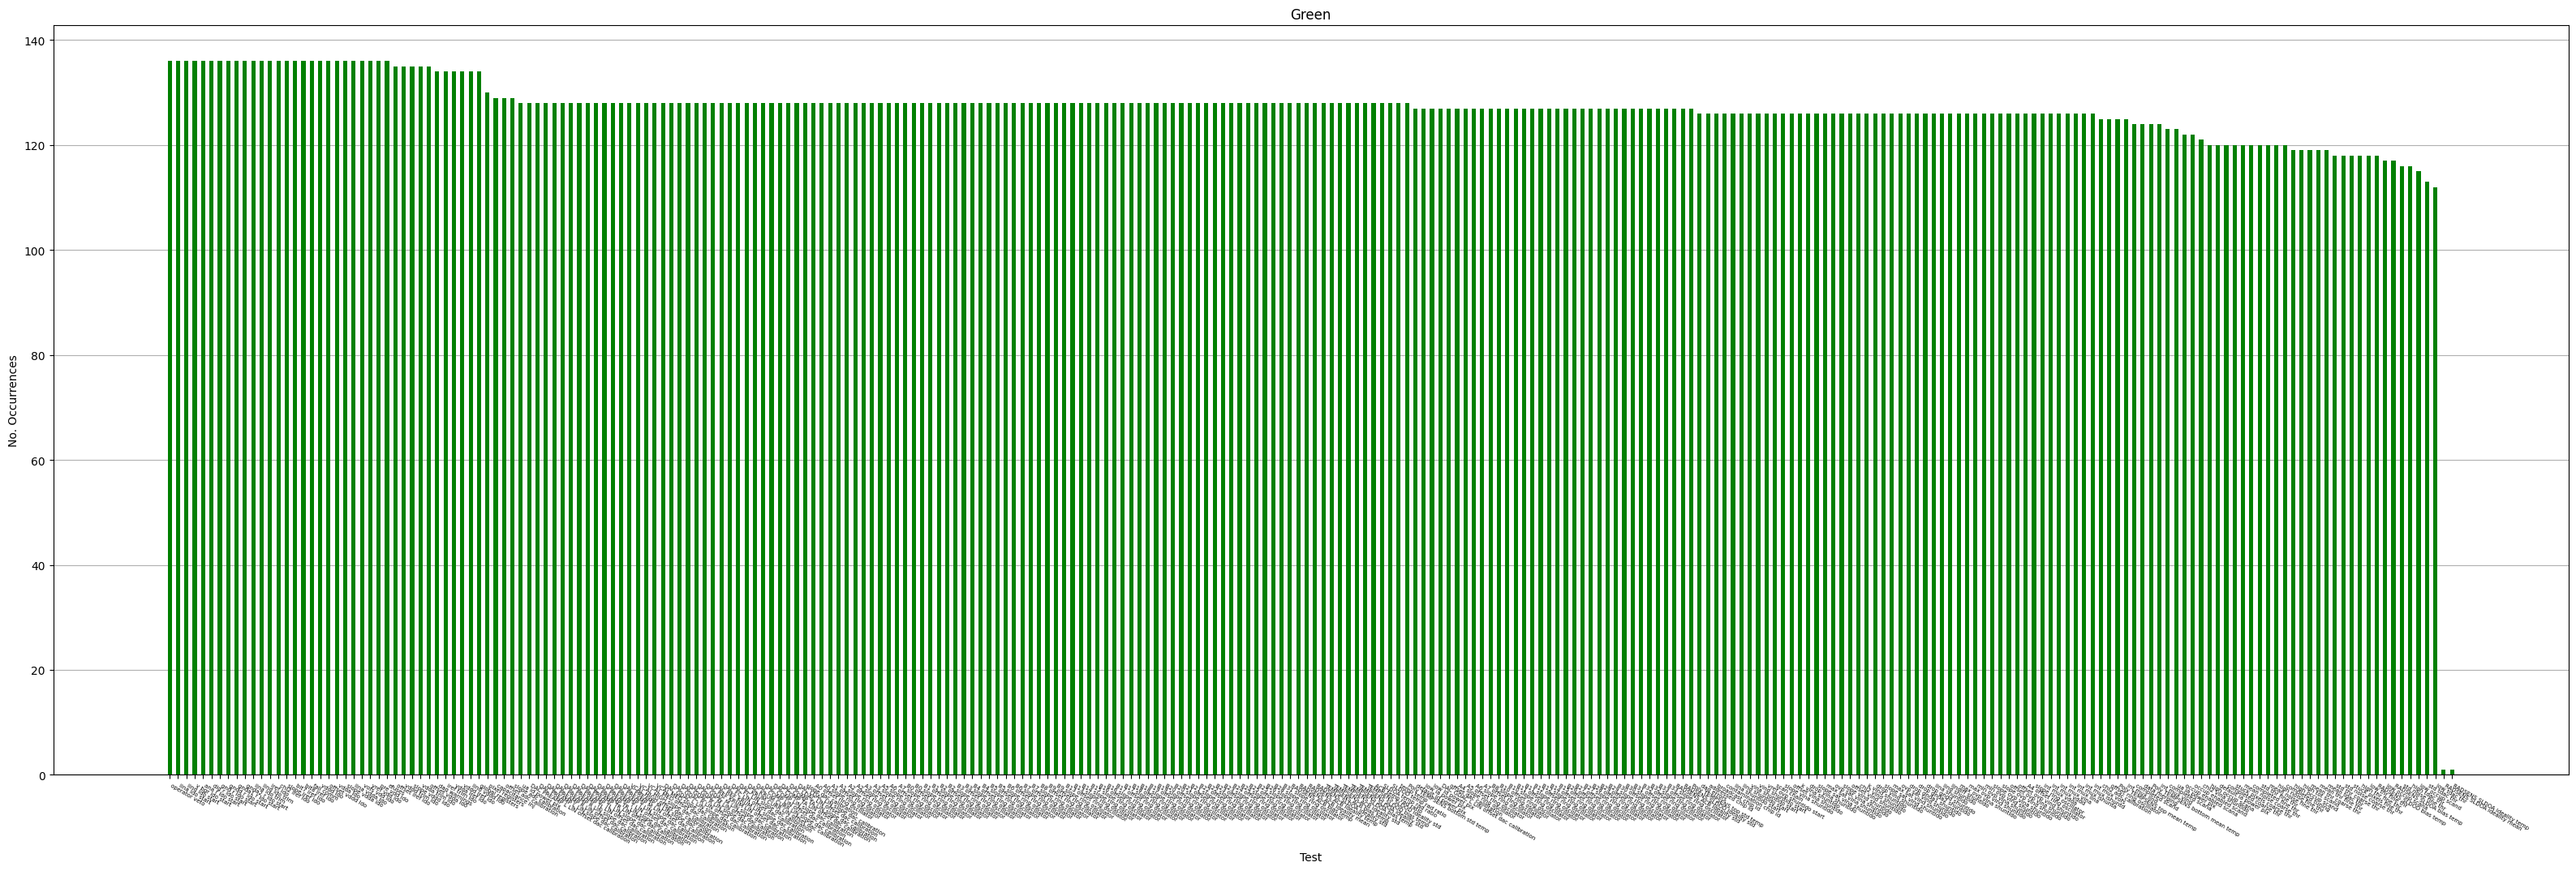

operator veto: 136
iina ldo start: 136
iind ldo start: 136
v bgr ldo start: 136
ana r ldo start: 136
dig r ldo start: 136
gnd r ldo start: 136
gndd r ldo start: 136
gnda1 r ldo start: 136
gnda2 r ldo start: 136
iina ldo trim: 136
iind ldo trim: 136
iref ldo: 136
chi2 iref ldo: 136
slope iref ldo: 136
bit7 iref ldo: 136
bit8 iref ldo: 136
fail comm: 136
vddd ldo: 136
offset vddd ldo: 136
vdda ldo: 136
slope vdda ldo: 136
iina vdda ldo: 136
vofs vdd ldo: 136
vref vdd ldo: 136
pre vdd ldo: 136
efuses: 136
offset iref ldo: 135
vddd trim ldo: 135
slope vddd ldo: 135
vdda trim ldo: 135
offset vdda ldo: 135
daq warnings: 134
iref trim ldo: 134
vdda iref ldo: 134
vddd iref ldo: 134
iind vddd ldo: 134
global registers: 134
pixel registers: 130
capacitance inj: 129
offset adc calibration: 129
slope adc calibration: 129
ua id power pix: 128
DAC PREAMP L LIN offset dac calibration: 128
DAC PREAMP L LIN slope dac calibration: 128
DAC PREAMP R LIN offset dac calibration: 128
DAC PREAMP R LIN slope d

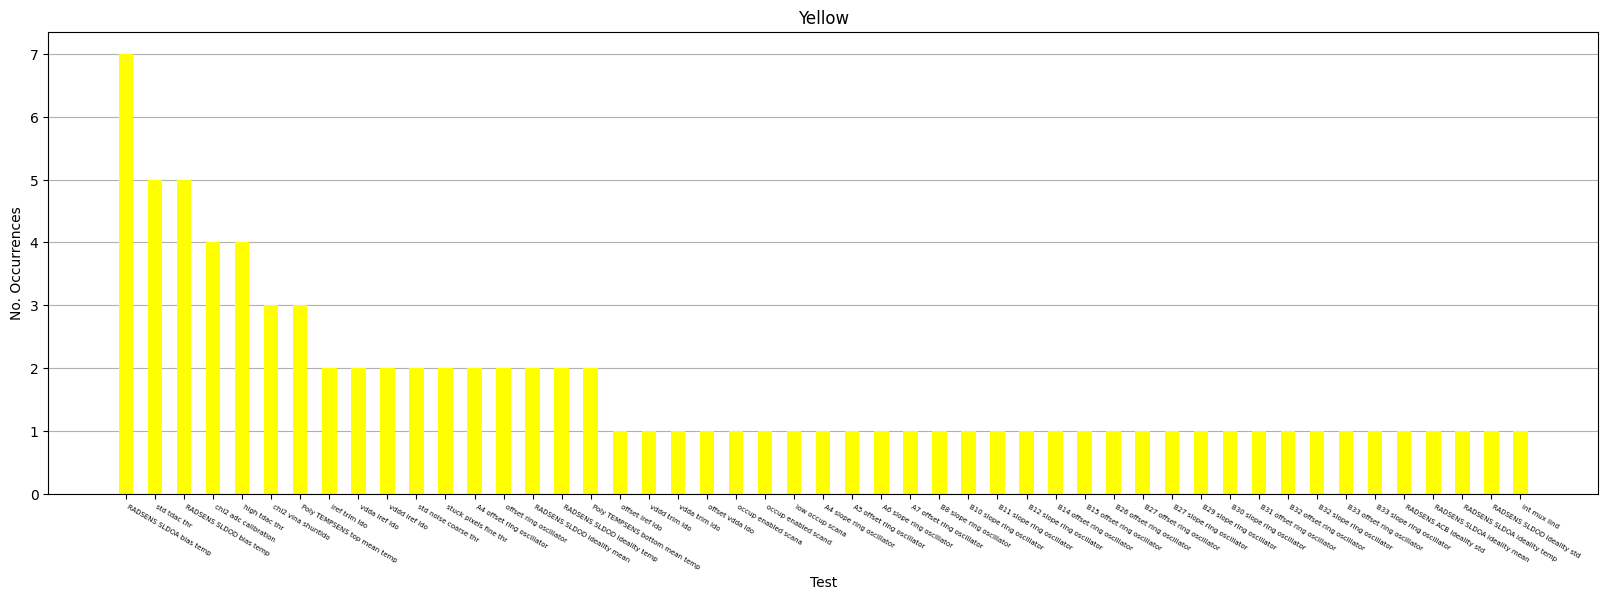

RADSENS SLDOA bias temp: 7
std tdac thr: 5
RADSENS SLDOD bias temp: 5
chi2 adc calibration: 4
high tdac thr: 4
chi2 vina shuntldo: 3
Poly TEMPSENS top mean temp: 3
iref trim ldo: 2
vdda iref ldo: 2
vddd iref ldo: 2
std noise coarse thr: 2
stuck pixels fine thr: 2
A4 offset ring oscillator: 2
offset ring oscillator: 2
RADSENS SLDOD ideality mean: 2
RADSENS SLDOD ideality temp: 2
Poly TEMPSENS bottom mean temp: 2
offset iref ldo: 1
vddd trim ldo: 1
vdda trim ldo: 1
offset vdda ldo: 1
occup enabled scana: 1
occup enabled scand: 1
low occup scana: 1
A4 slope ring oscillator: 1
A5 offset ring oscillator: 1
A6 slope ring oscillator: 1
A7 offset ring oscillator: 1
B8 slope ring oscillator: 1
B10 slope ring oscillator: 1
B11 slope ring oscillator: 1
B12 slope ring oscillator: 1
B14 offset ring oscillator: 1
B15 offset ring oscillator: 1
B26 offset ring oscillator: 1
B27 offset ring oscillator: 1
B27 slope ring oscillator: 1
B29 slope ring oscillator: 1
B30 slope ring oscillator: 1
B31 offset r

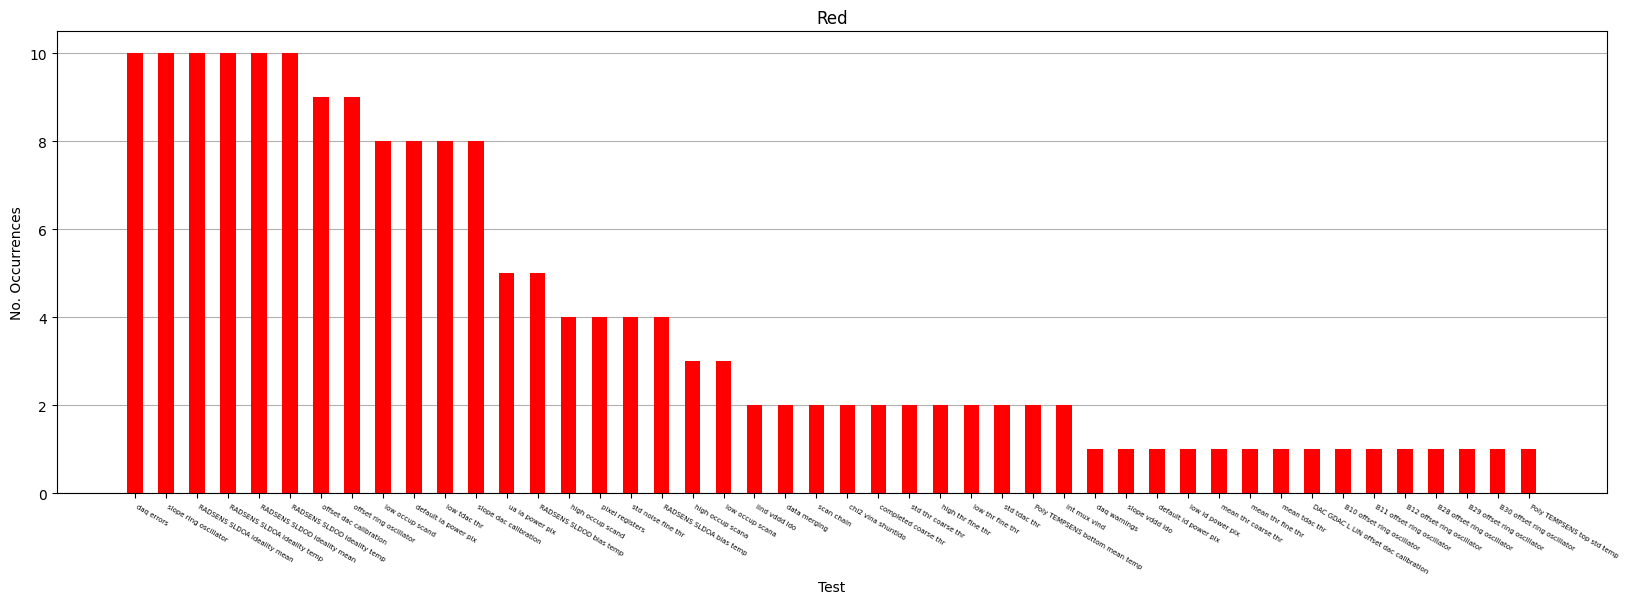

daq errors: 10
slope ring oscillator: 10
RADSENS SLDOA ideality mean: 10
RADSENS SLDOA ideality temp: 10
RADSENS SLDOD ideality mean: 10
RADSENS SLDOD ideality temp: 10
offset dac calibration: 9
offset ring oscillator: 9
low occup scand: 8
default ia power pix: 8
low tdac thr: 8
slope dac calibration: 8
ua ia power pix: 5
RADSENS SLDOD bias temp: 5
high occup scand: 4
pixel registers: 4
std noise fine thr: 4
RADSENS SLDOA bias temp: 4
high occup scana: 3
low occup scana: 3
iind vddd ldo: 2
data merging: 2
scan chain: 2
chi2 vina shuntldo: 2
completed coarse thr: 2
std thr coarse thr: 2
high thr fine thr: 2
low thr fine thr: 2
std tdac thr: 2
Poly TEMPSENS bottom mean temp: 2
int mux vind: 2
daq warnings: 1
slope vddd ldo: 1
default id power pix: 1
low id power pix: 1
mean thr coarse thr: 1
mean thr fine thr: 1
mean tdac thr: 1
DAC GDAC L LIN offset dac calibration: 1
B10 offset ring oscillator: 1
B11 offset ring oscillator: 1
B12 offset ring oscillator: 1
B28 offset ring oscillator: 1


In [54]:
#plots all tests and the number of chips with them on red, green, yellow, and gray graphs
#using _wafer_data file
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/_wafer_data_NC0W14-05A4_20240607_150356.json'), 'r') as file:
    data = json.load(file)

redtests = {}
yellowtests = {}
greentests = {}
graytests = {}
extra = {} #for chips/tests with status 3--what does that mean??
for k,v in data.items(): #loop through lines of json file to find statistics dictionary
    if k == "statistics": 
        for test, stats in v.items(): #loop through the statistics dictionary, which contains each test
            if isinstance(stats, dict):
                for a, b in stats.items(): #loop through the test's dictionary to get counts
                    if a == "counts":
                        for stat, count in b.items():
                            if stat == "-1":
                                graytests.update({test: count})
                            elif stat == "0":
                                greentests.update({test: count})
                            elif stat == "1":
                                yellowtests.update({test: count})
                            elif stat == "2":
                                redtests.update({test: count})
                            elif stat == "3":
                                extra.update({test: count})
                            else:
                                print(f'Stat does not exist: {stat} for test {test}')

#Data for each plot
keys_to_remove = []
for k, v in list(graytests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del graytests[k]    
alph_gray = dict(Counter(graytests).most_common())
gray_x = [s.replace("_"," ") for s in list(alph_gray.keys())]
gray_y = list(alph_gray.values())

keys_to_remove = []
for k, v in list(greentests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del greentests[k]    
alph_green = dict(Counter(greentests).most_common())
green_x = [s.replace("_"," ") for s in list(alph_green.keys())]
green_y = list(alph_green.values())

keys_to_remove = []
for k, v in list(yellowtests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del yellowtests[k]    
alph_yellow = dict(Counter(yellowtests).most_common())
yellow_x = [s.replace("_"," ") for s in list(alph_yellow.keys())]
yellow_y = list(alph_yellow.values())

keys_to_remove = []
for k, v in list(redtests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del redtests[k]    
alph_red = dict(Counter(redtests).most_common())
red_x = [s.replace("_"," ") for s in list(alph_red.keys())]
red_y = list(alph_red.values())

# creating the bar plots
def error_plot(statcolor, x, y, size):
    fig = plt.figure(figsize = size)
    plt.bar(x, y, color =statcolor, 
            width = 0.5, zorder=2)
    plt.grid(axis = 'y', zorder = 1)
    plt.xlabel("Test")
    plt.ylabel("No. Occurrences")
    plt.title(statcolor)
    plt.xticks(rotation=-30, ha='left', fontsize = 5)
    plt.show()
    for i in range(len(x)):
        print(f'{x[i]}: {y[i]}')

error_plot(statcolor = "Gray", x=gray_x, y=gray_y, size=(40,12))
error_plot(statcolor = "Green", x=green_x, y=green_y, size=(40,12))
error_plot(statcolor = "Yellow", x=yellow_x, y=yellow_y, size=(20,6))
error_plot(statcolor = "Red", x=red_x, y=red_y, size=(20,6))
